ML Lab Week 13 Clustering Lab Instructions


Name:Chethana K R

Srn:PES2UG23CS151

Sec: C



In [2]:

!pip install pandas numpy scikit-learn matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv("/content/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [6]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])
X = preprocess.fit_transform(df)
X.shape

(45211, 53)

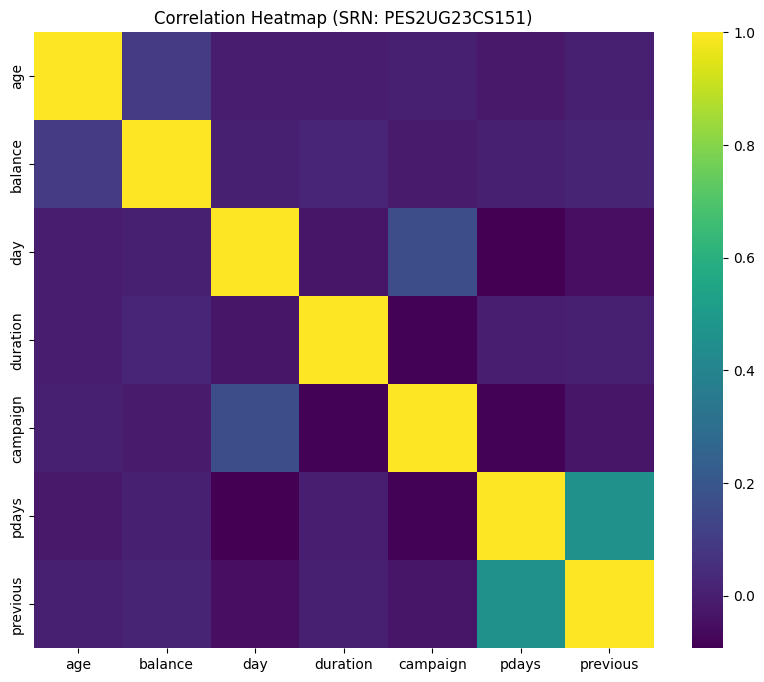

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='viridis')
plt.title('Correlation Heatmap (SRN: PES2UG23CS151)')
plt.show()

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

Explained variance ratio: [0.14607051 0.10364595]
Total variance: 0.24971646459209645


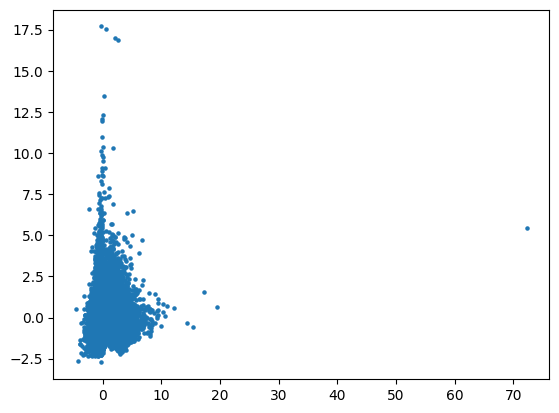

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Total variance:', pca.explained_variance_ratio_.sum())
plt.scatter(X_pca[:,0], X_pca[:,1], s=5)
plt.show()

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

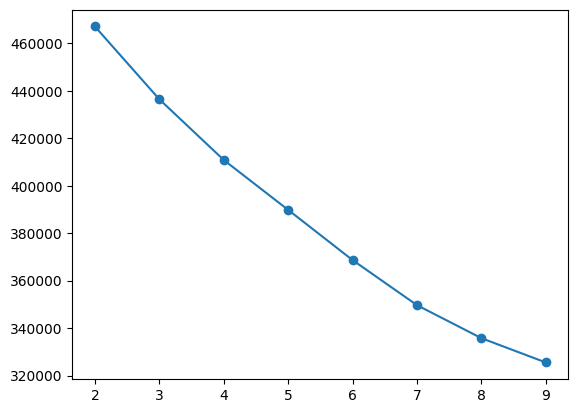

In [9]:
inertias=[]
K=range(2,10)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)
plt.plot(K, inertias, marker='o')
plt.show()

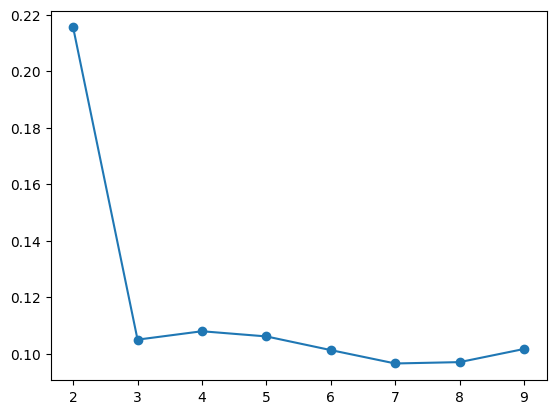

In [10]:
sil_scores=[]
for k in K:
    km=KMeans(n_clusters=k, n_init=10, random_state=42)
    labels=km.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))
plt.plot(K, sil_scores, marker='o')
plt.show()

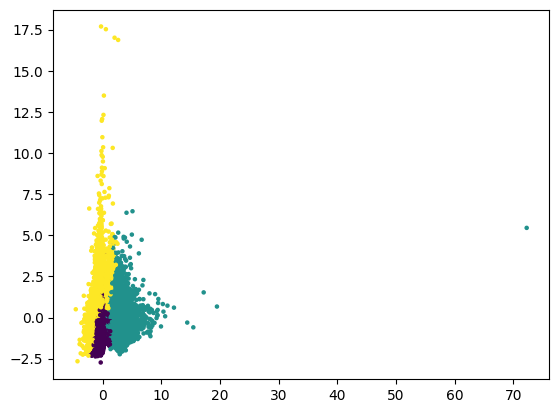

In [11]:
k=3
kmeans=KMeans(n_clusters=k, n_init=10, random_state=42)
labels_km=kmeans.fit_predict(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km, s=5)
plt.show()

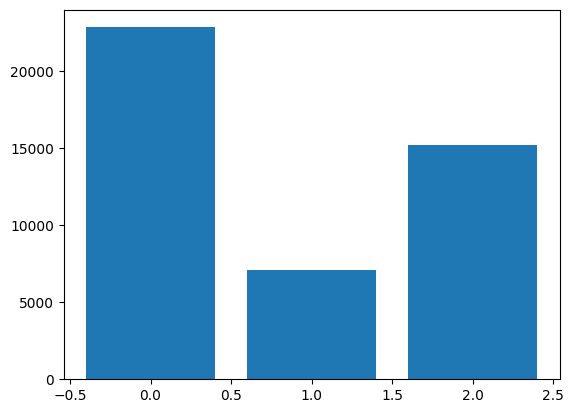

In [12]:
sizes=np.bincount(labels_km)
plt.bar(range(k), sizes)
plt.show()

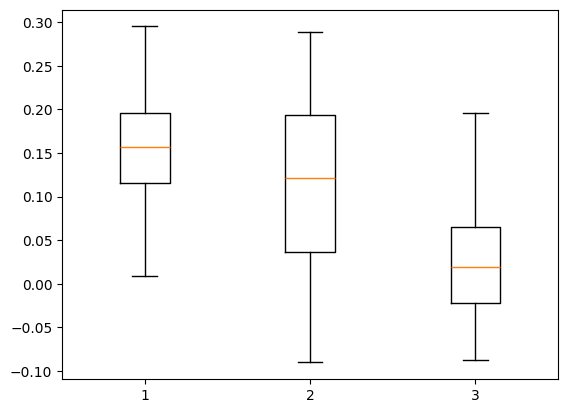

In [13]:
samples=silhouette_samples(X, labels_km)
data=[samples[labels_km==i] for i in range(k)]
plt.boxplot(data)
plt.show()

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

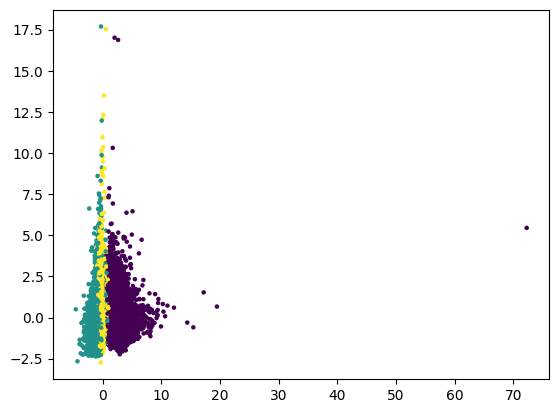

In [14]:
def bisecting_kmeans(X, target_k=3):
    clusters=[np.arange(X.shape[0])]
    final_labels=np.zeros(X.shape[0], dtype=int)
    while len(clusters)<target_k:
        inertias=[]
        for idx in clusters:
            km=KMeans(n_clusters=1).fit(X[idx])
            inertias.append(km.inertia_)
        split=np.argmax(inertias)
        to_split=clusters.pop(split)
        km2=KMeans(n_clusters=2).fit(X[to_split])
        A=to_split[km2.labels_==0]
        B=to_split[km2.labels_==1]
        clusters.append(A);clusters.append(B)
    for c_id, idx in enumerate(clusters): final_labels[idx]=c_id
    return final_labels
labels_bkm=bisecting_kmeans(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_bkm, s=5)
plt.show()